# Applied Data Science Capstone Project

Import libraries

In [1]:
#!conda install -c conda-forge geopandas --yes

In [18]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geocoder
import requests

The State of New York provided an Essex County Tourist Attraction dataset on Data.gov. The csv file of the dataset was downloaded and read into a Pandas dataframe. 

In [3]:
df = pd.read_csv(r'C:\Users\chase\OneDrive\Documents\Coursera\IBM Data Science\Data\Essex_County_Tourist_Attractions.csv')

In [4]:
df.head()

,Tourist Attraction,Address,URL
0,Adirondack Flying Service (Scenic Flights),"27 Airport Lane, Lake Placid, NY 12946",http://www.flyanywhere.com/adirondack_scenic_f...
1,Adirondack Interpretive Center,"5922 State Rt. 28N, Newcomb, NY 12852",http://www.esf.edu/aic/
2,Adirondack History Center Museum,"7590 Court Street, Elizabethtown, NY 12932",http://www.adkhistorycenter.org/index.html
3,Adirondack Scenic Railroad,"242 Station St, Lake Placid, NY 12946",http://www.adirondackrr.com/
4,Ausable Chasm,"2144 Route 9, Ausable Chasm, NY 12911",http://www.ausablechasm.com/


In [5]:
df.shape

(24, 3)

Data overview:

The CSV file contains 24 tourist attractions for Essex county. 

Each attraction contains three columns: The Tourist Attraction name, the physical address, and a URL to the attraction's website.

The address data does not contain coordinates. The addresses were geocoded using the geocoder module to determine the coordinates.

Note: The Geopy module geocoded only half of the addresses; therefore, the Geocoder module was used instead. Geocoder using the ArcGIS provider successfully geocoded all addresses.

In [6]:
# Add empty latitude and longtiude columns to the dataframe
df['Latitude'] = None
df['Longitude'] = None

# Drop the URL column as it is not needed
df = df.drop('URL', 1)

In [7]:
# Check results
df.head()

,Tourist Attraction,Address,Latitude,Longitude
0,Adirondack Flying Service (Scenic Flights),"27 Airport Lane, Lake Placid, NY 12946",None,None
1,Adirondack Interpretive Center,"5922 State Rt. 28N, Newcomb, NY 12852",None,None
2,Adirondack History Center Museum,"7590 Court Street, Elizabethtown, NY 12932",None,None
3,Adirondack Scenic Railroad,"242 Station St, Lake Placid, NY 12946",None,None
4,Ausable Chasm,"2144 Route 9, Ausable Chasm, NY 12911",None,None


The following code used the Geopy Nominatim for geocoding. Only 12 out of 23 addresses were successfully geocoded. The code has been commented out, but retained for reference. 

In [8]:
##Iterate through each row and update the lat/lng data

#for i, row in df.iterrows():
    #address = df.loc[i, 'Address']
    #try:
        #geolocator = Nominatim(user_agent='wessex_ny')
        #location = geolocator.geocode(address)
        #df.at[i,'Latitude'] = location.latitude
        #df.at[i,'Longitude'] = location.longitude
    #except:
        #continue

Instead the Geocoder module was used along with the ArcGIS provider.

In [9]:
for i, row in df.iterrows():
    address = df.loc[i, 'Address']
    try:
        g = geocoder.arcgis(address)
        df.at[i,'Latitude'] = g.lat
        df.at[i,'Longitude'] = g.lng
    except:
        continue

In [11]:
# Check that all latitude and longitudes were geocoded
df

,Tourist Attraction,Address,Latitude,Longitude
0,Adirondack Flying Service (Scenic Flights),"27 Airport Lane, Lake Placid, NY 12946",44.266,-73.9638
1,Adirondack Interpretive Center,"5922 State Rt. 28N, Newcomb, NY 12852",43.9719,-74.1848
2,Adirondack History Center Museum,"7590 Court Street, Elizabethtown, NY 12932",44.2152,-73.5912
3,Adirondack Scenic Railroad,"242 Station St, Lake Placid, NY 12946",44.2758,-73.9871
4,Ausable Chasm,"2144 Route 9, Ausable Chasm, NY 12911",44.5236,-73.4643
5,Crown Point Historic Site,"21 Grandview Drive, Crown Point, NY 12928",44.0261,-73.4267
6,Depot Theatre,6705 Main Street (Westport Train Station) West...,44.1867,-73.452
7,Essex County Fair,South of the Westport train station on Main St...,44.1881,-73.4521
8,Fort Ticonderoga,"100 Fort Ti Road, Ticonderoga, New York",43.8489,-73.4027
9,Hancock House Museum,"6 Moses Circle, Ticonderoga, NY 12883",43.8488,-73.4346


Retrieve the coordinates for Essex County, NY

In [13]:
g2 = geocoder.arcgis('Essex County, NY')
essex_lat = g2.lat
essex_long = g2.lng
print('The coordinates for Essex County, NY are {}, {}'.format(essex_lat, essex_long))

The coordinates for Essex County, NY are 44.107556973000044, -73.79125846999995


Define Foursquare credentials

In [1]:
# The code was removed by Watson Studio for sharing.

Define function to retrieve venues

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Tourist Attraction', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the function. The name variable will be based off of the tourist attraction the venue is associated with.

In [53]:
# Run the function
limit = 100
radius = 500
ny_venues = getNearbyVenues(names= df['Tourist Attraction'],
                                   latitudes= df['Latitude'],
                                   longitudes= df['Longitude'])

In [54]:
ny_venues.head(20)

,Tourist Attraction,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adirondack Flying Service (Scenic Flights),44.265960,-73.963800,Big Slide Brewery & Public House,44.266050,-73.970058,Brewery
1,Adirondack Flying Service (Scenic Flights),44.265960,-73.963800,Lake Placid Airport (LKP) (Lake Placid Airport),44.263996,-73.966499,Airport
2,Adirondack Flying Service (Scenic Flights),44.265960,-73.963800,Lake Placid Lacrosse Fields,44.267331,-73.963480,Athletics & Sports
3,Adirondack Flying Service (Scenic Flights),44.265960,-73.963800,Olympic Sports Complex,44.267408,-73.969652,Athletics & Sports
4,Adirondack Flying Service (Scenic Flights),44.265960,-73.963800,Horse Show Grounds,44.261818,-73.966058,Park
5,Adirondack Interpretive Center,43.971910,-74.184760,Adirondack Interpretative Center,43.974266,-74.187146,Nature Preserve
6,Adirondack History Center Museum,44.215200,-73.591210,Deer's Head Inn,44.214039,-73.594513,American Restaurant
7,Adirondack History Center Museum,44.215200,-73.591210,Stewart's Shops,44.214180,-73.596110,Convenience Store
8,Adirondack History Center Museum,44.215200,-73.591210,Adirondack History Center Museum,44.215417,-73.591340,History Museum
9,Adirondack History Center Museum,44.215200,-73.591210,Kinney's Drugs,44.213521,-73.594598,Pharmacy


In [55]:
ny_venues.shape

(209, 7)

In [81]:
ny_venues['Tourist Attraction'].value_counts()

Lake Placid Skating                           53
Lake Placid Olympic Museum                    53
Lake Placid Center for the Arts               26
Ticonderoga Heritage Museum                    7
Ausable Chasm                                  6
Whiteface Mountain                             6
Hancock House Museum                           5
Adirondack Flying Service (Scenic Flights)     5
Depot Theatre                                  4
Olympic Cross-Country Biathlon Center          4
Adirondack History Center Museum               4
Essex County Fair                              4
Adirondack Scenic Railroad                     4
Crown Point Historic Site                      4
Olympic Jumping Complex                        4
Lake Placid-North Elba Historical Society      4
Lake Placid Sliding Center                     4
Lake Placid Horse Shows                        3
John Brown Farm                                2
Santa's Workshop                               2
Fort Ticonderoga    

There are 209 venues within a 500m radius of all tourist attractions. Below are the various types of venue categories returned in the search.

In [42]:
cat_type = set(ny_venues['Venue Category'].values)

In [43]:
cat_type

{'Advertising Agency',
 'Airport',
 'American Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Beach',
 'Bookstore',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Burger Joint',
 'Cajun / Creole Restaurant',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Clothing Store',
 'Coffee Shop',
 'Convenience Store',
 'Cupcake Shop',
 'Deli / Bodega',
 'Department Store',
 'Diner',
 'Discount Store',
 'Dog Run',
 'Exhibit',
 'Fast Food Restaurant',
 'Gas Station',
 'Golf Course',
 'Grocery Store',
 'Harbor / Marina',
 'Health Food Store',
 'Historic Site',
 'History Museum',
 'Hockey Arena',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Ice Cream Shop',
 'Italian Restaurant',
 'Jewelry Store',
 'Lighthouse',
 'Liquor Store',
 'Mexican Restaurant',
 'Miscellaneous Shop',
 'Motel',
 'Mountain',
 'Museum',
 'Nature Preserve',
 'New American Restaurant',
 'Park',
 'Parking',
 'Performing Arts Venue',
 'Pharmacy',
 'Pizza Place',
 'Resort',
 'River',
 'Roof Deck',
 'Sandwich P

There are various category types describing restaurants and other food establishments. A new dataframe was created for restaurants. 

In [46]:
# Create a new list by iterating through each venue searching for keywords
rest_list = []
for word in ['Restaurant', 'Steakhouse', 'Joint', 'Deli', 'Breakfast', 'Diner', 'Place']:
    for item in ny_venues['Venue Category'].tolist():
        if word in item:
            rest_list.append(item)
rest_list = set(rest_list)
    

In [56]:
# Examine the results of the restaurant list to ensure all desired category types are included
rest_list

{'American Restaurant',
 'BBQ Joint',
 'Breakfast Spot',
 'Burger Joint',
 'Cajun / Creole Restaurant',
 'Chinese Restaurant',
 'Deli / Bodega',
 'Diner',
 'Fast Food Restaurant',
 'Italian Restaurant',
 'Mexican Restaurant',
 'New American Restaurant',
 'Pizza Place',
 'Sandwich Place',
 'Snack Place',
 'Southern / Soul Food Restaurant',
 'Steakhouse',
 'Tapas Restaurant'}

In [48]:
ny_food = ny_venues[ny_venues['Venue Category'].isin(rest_list)]

In [51]:
ny_food.shape

(51, 7)

In [65]:
ny_food.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Adirondack History Center Museum,44.21520,-73.59121,Deer's Head Inn,44.214039,-73.594513,American Restaurant
10,Adirondack Scenic Railroad,44.27579,-73.98707,Lisa G's,44.277717,-73.982238,American Restaurant
11,Adirondack Scenic Railroad,44.27579,-73.98707,Liquids and Solids at the Handlebar,44.277442,-73.982151,Tapas Restaurant
35,Hancock House Museum,43.84878,-73.43459,Hot Biscuit Diner,43.848044,-73.433604,Diner
37,Hancock House Museum,43.84878,-73.43459,Wagon Wheel,43.852489,-73.437387,American Restaurant


There are 51 restaurants and other food establishments within a 500m radius of all tourist attractions in Essex County.

In [82]:
ny_food['Neighborhood'].value_counts()

Lake Placid Skating                          15
Lake Placid Olympic Museum                   15
Lake Placid Center for the Arts               7
Ticonderoga Heritage Museum                   5
Hancock House Museum                          3
Lake Placid-North Elba Historical Society     2
Adirondack Scenic Railroad                    2
High Falls Gorge                              1
Adirondack History Center Museum              1
Name: Neighborhood, dtype: int64

Based on the value counts, not all tourist attractions have restaurants nearby. Only 9 of the 24 attractions had a restaurant nearby, and most were near Lake Placid attractions.

We will determine the 5 most common venues surrounding each of the 9 attractions.

In [66]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_food['Neighborhood'] 

In [67]:
ny_onehot = ny_onehot[['Neighborhood'] + [col for col in ny_onehot.columns if col != 'Neighborhood']]

In [68]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()

In [70]:
def most_common_venues(row, num_top_venues):
    row_cat = row.iloc[1:]
    row_cat_sorted = row_cat.sort_values(ascending=False)
    return row_cat_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['Tourist Attraction']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

tourism_venues_sorted = pd.DataFrame(columns=columns)
tourism_venues_sorted['Tourist Attraction'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    tourism_venues_sorted.iloc[ind, 1:] = most_common_venues(ny_grouped.iloc[ind, :], 
                                                                   num_top_venues)

In [79]:
tourism_venues_sorted

,Tourist Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adirondack History Center Museum,American Restaurant,Steakhouse,BBQ Joint,Breakfast Spot,Burger Joint
1,Adirondack Scenic Railroad,Tapas Restaurant,American Restaurant,Southern / Soul Food Restaurant,Snack Place,Sandwich Place
2,Hancock House Museum,American Restaurant,Diner,Pizza Place,BBQ Joint,Breakfast Spot
3,High Falls Gorge,Diner,Tapas Restaurant,Steakhouse,BBQ Joint,Breakfast Spot
4,Lake Placid Center for the Arts,Deli / Bodega,Fast Food Restaurant,Mexican Restaurant,BBQ Joint,Burger Joint
5,Lake Placid Olympic Museum,American Restaurant,Italian Restaurant,Breakfast Spot,Southern / Soul Food Restaurant,Snack Place
6,Lake Placid Skating,American Restaurant,Italian Restaurant,Breakfast Spot,Southern / Soul Food Restaurant,Snack Place
7,Lake Placid-North Elba Historical Society,Tapas Restaurant,American Restaurant,Southern / Soul Food Restaurant,Snack Place,Sandwich Place
8,Ticonderoga Heritage Museum,American Restaurant,Diner,Sandwich Place,Pizza Place,Deli / Bodega


Next, we will identify the nearby hotels and motels.

In [59]:
hotel_lst = ['Hotel', 'Motel']

In [60]:
ny_hotel = ny_venues[ny_venues['Venue Category'].isin(hotel_lst)]

In [61]:
ny_hotel.shape

(16, 7)

There are 16 hotels and motels near some of the attractions.

In [83]:
ny_hotel['Tourist Attraction'].value_counts()

Lake Placid Skating                      5
Lake Placid Olympic Museum               5
Lake Placid Center for the Arts          2
Lake Placid Sliding Center               1
High Falls Gorge                         1
Whiteface Mountain                       1
Olympic Cross-Country Biathlon Center    1
Name: Tourist Attraction, dtype: int64

Only 7 of the attractions had hotels/motels nearby and most are near Lake Placid

# Plot the nearby restaurants and hotels

In [216]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')

In [204]:
# Create dataframe of tourist attractions and create columns set to Zero
ny_venue_counts = pd.DataFrame(df['Tourist Attraction']).reset_index()
ny_venue_counts['Restaurant'] = 0
ny_venue_counts['Hotel'] = 0
ny_venue_counts = ny_venue_counts.set_index('Tourist Attraction')
ny_venue_counts = ny_venue_counts.drop('index', 1)

# Get restaurant value counts
food_values = pd.DataFrame(ny_food['Neighborhood'].value_counts().reset_index())
food_values = food_values.rename(columns={'Neighborhood': 'Restaurant', 'index': 'Tourist Attraction'})
food_values = food_values.set_index('Tourist Attraction')

# Get hotel value counts
hotel_values = pd.DataFrame(ny_hotel['Tourist Attraction'].value_counts().reset_index())
hotel_values = hotel_values.rename(columns={'Tourist Attraction': 'Hotel', 'index': 'Tourist Attraction'})
hotel_values = hotel_values.set_index('Tourist Attraction')

In [207]:
# Update the dataframe with the value counts
ny_venue_counts.update(food_values)
ny_venue_counts.update(hotel_values)

In [208]:
ny_venue_counts

,Restaurant,Hotel
Tourist Attraction,,
Adirondack Flying Service (Scenic Flights),0.0,0.0
Adirondack Interpretive Center,0.0,0.0
Adirondack History Center Museum,1.0,0.0
Adirondack Scenic Railroad,2.0,0.0
Ausable Chasm,0.0,0.0
Crown Point Historic Site,0.0,0.0
Depot Theatre,0.0,0.0
Essex County Fair,0.0,0.0
Fort Ticonderoga,0.0,0.0


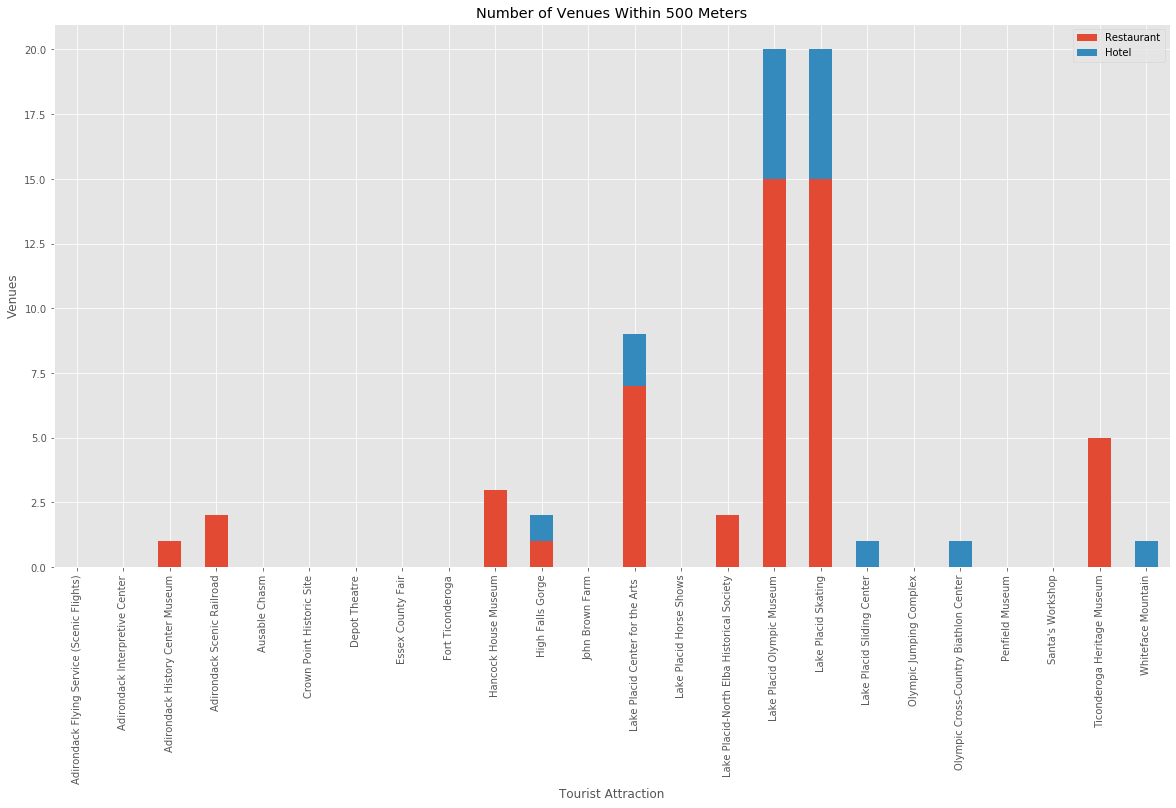

In [217]:
ny_venue_counts.plot(kind='bar', stacked = True, figsize=(20,10))
plt.title('Number of Venues Within 500 Meters')
plt.ylabel('Venues')
plt.xlabel('Tourist Attraction')
plt.show()

# Map the venues

In [218]:
import folium
from folium import plugins

In [253]:
# Clean up column names
ny_food = ny_food.rename(columns={'Venue Latitude': 'Venue_Latitude', 'Venue Longitude': 'Venue_Longitude', 'Venue Category': 'Venue_Category'})
ny_hotel = ny_hotel.rename(columns={'Venue Latitude': 'Venue_Latitude', 'Venue Longitude': 'Venue_Longitude', 'Venue Category': 'Venue_Category'})

In [260]:
#Create base map
world_map = folium.Map(location = [essex_lat, essex_long], zoom_start = 9)

# Plot the tourist attractions
ven = folium.map.FeatureGroup()
hot = folium.map.FeatureGroup()
rest = folium.map.FeatureGroup()

for lat,lng in zip(ny_venues.Latitude, ny_venues.Longitude):
    ven.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=1
        )
    )

for lat,lng in zip(ny_food.Venue_Latitude, ny_food.Venue_Longitude):
    rest.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=3,
            color='red',
            fill=True,
            fill_opacity=1
        )
    )    

for lat,lng in zip(ny_hotel.Venue_Latitude, ny_hotel.Venue_Longitude):
    hot.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=3,
            color='green',
            fill=True,
            fill_opacity=1
        )
    )
    
world_map.add_child(ven)
world_map.add_child(hot)
world_map.add_child(rest)

Visualize the venues in clusters

In [258]:
# Create basemap centered on Essex County
ny_map = folium.Map(location = [essex_lat, essex_long], zoom_start = 9)

# instantiate tourist attraction object
ven = folium.map.FeatureGroup()

# add attratctions to object
for lat,lng in zip(ny_venues.Latitude, ny_venues.Longitude):
    ven.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=2,
            color='blue',
            fill=True,
            fill_opacity=1
        )
    )
ny_map.add_child(ven)
    
    
# instantiate a mark cluster object
rest = plugins.MarkerCluster().add_to(ny_map)
hot_mot = plugins.MarkerCluster().add_to(ny_map)

# add each data point to the mark cluster
for lat, lng, label in zip(ny_food.Venue_Latitude, ny_food.Venue_Longitude, ny_food.Venue_Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(rest)

for lat,lng, label in zip(ny_hotel.Venue_Latitude, ny_hotel.Venue_Longitude, ny_hotel.Venue_Category):
    folium.Marker(
        location = [lat,lng],
        icon=None,
        popup=label
    ).add_to(hot_mot)
    
# display map
ny_map